In [1]:
import os

# Check the current working directory
print("Current working directory:", os.getcwd())

# Change working directory to the project root (if it's not already)
os.chdir('/Users/piercest/ATOdemandAnalysis')

# Check if the change was successful
print("Updated working directory:", os.getcwd())


Current working directory: /Users/piercest/ATOdemandAnalysis/notebooks
Updated working directory: /Users/piercest/ATOdemandAnalysis


In [3]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from src.components import generate_components
from src.machines import generate_machines
from src.production import generate_production_times, generate_gozinto_factors
from src.demand import generate_price_sets,save_demands_to_csv
from tests.model_test import analyze_csv_files
from config.parameters import NUM_COMPONENTS, NUM_PRODUCTS, NUM_MACHINES, NUM_SCENARIOS,RANDOM_SEED
from src.stochastic_models import *

from src.pipeline import run_pipeline


# Test the generative functions

In [4]:
# 1. Test: Component Generation
components = generate_components()
print("Generated Components and Costs:")
for component, cost in components.items():
    print(f"{component}: ${cost:.2f}")

Generated Components and Costs:
Component_1: $4.37
Component_2: $9.56
Component_3: $7.59
Component_4: $6.39
Component_5: $2.40
Component_6: $2.40
Component_7: $1.52
Component_8: $8.80
Component_9: $6.41
Component_10: $7.37
Component_11: $1.19
Component_12: $9.73
Component_13: $8.49
Component_14: $2.91
Component_15: $2.64
Component_16: $2.65
Component_17: $3.74
Component_18: $5.72
Component_19: $4.89
Component_20: $3.62
Component_21: $6.51
Component_22: $2.26
Component_23: $3.63
Component_24: $4.30
Component_25: $5.10
Component_26: $8.07
Component_27: $2.80
Component_28: $5.63
Component_29: $6.33
Component_30: $1.42
Component_31: $6.47
Component_32: $2.53
Component_33: $1.59
Component_34: $9.54
Component_35: $9.69
Component_36: $8.28
Component_37: $3.74
Component_38: $1.88
Component_39: $7.16
Component_40: $4.96
Component_41: $2.10
Component_42: $5.46
Component_43: $1.31
Component_44: $9.18
Component_45: $3.33
Component_46: $6.96
Component_47: $3.81
Component_48: $5.68
Component_49: $5.

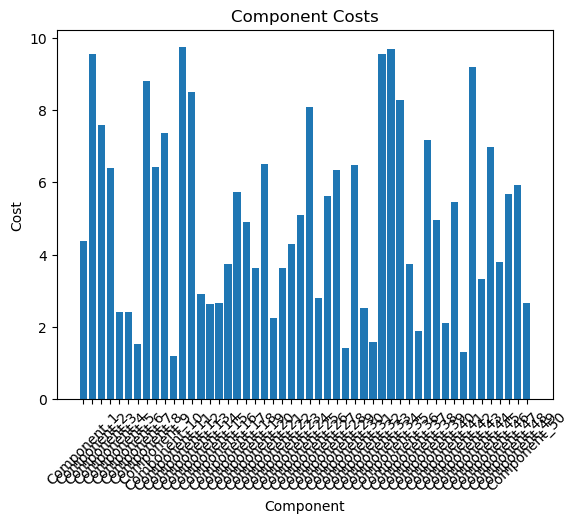

In [5]:
# Visualize Component Costs
plt.bar(components.keys(), components.values())
plt.title("Component Costs")
plt.xlabel("Component")
plt.ylabel("Cost")
plt.xticks(rotation=45)
plt.show()

In [6]:
# 2. Test: Machine Generation
machines = generate_machines()
print("\nGenerated Machines and Time Availability:")
for machine, time in machines.items():
    print(f"{machine}: {time:.2f} hours")


Generated Machines and Time Availability:
Machine_1: 19.54 hours
Machine_2: 16.63 hours
Machine_3: 19.09 hours


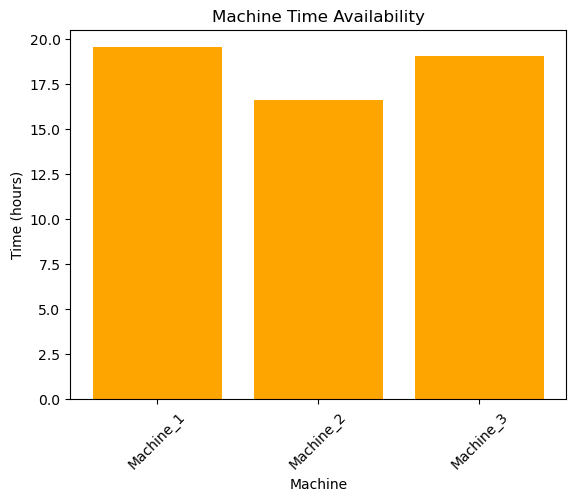

In [7]:
# Visualize Machine Time Availability
plt.bar(machines.keys(), machines.values(), color="orange")
plt.title("Machine Time Availability")
plt.xlabel("Machine")
plt.ylabel("Time (hours)")
plt.xticks(rotation=45)
plt.show()

In [8]:
# 3. Test: Production Times
production_times = generate_production_times()
print("\nGenerated Production Times (hours per component per machine):")
print(production_times)


Generated Production Times (hours per component per machine):
[[4.52672308 3.1905499  4.64843406]
 [0.89821626 1.38192288 0.7035228 ]
 [1.96398649 2.2490478  1.72107064]
 [4.22931879 2.10538997 1.76420529]
 [2.94213237 1.13415901 4.10988641]
 [0.8354779  4.94099121 3.97510146]
 [1.39422057 0.52484953 4.16957643]
 [3.68085805 3.78053226 3.97071656]
 [0.83320093 2.11309578 1.02141077]
 [4.38396542 3.30484157 1.98904111]
 [0.78601258 1.89942045 1.96332495]
 [3.7832278  3.36900862 4.49245734]
 [2.62496716 1.03817411 3.70960154]
 [3.92353272 3.02574739 3.96935231]
 [2.72208018 2.85229773 2.42393458]
 [0.61438607 0.98551142 0.64143134]
 [3.36384685 1.91460191 2.78856811]
 [4.58404913 1.62181503 2.34672315]
 [3.89998012 1.52959174 0.84640959]
 [1.80388154 1.22549579 4.68363944]
 [4.13654171 3.3503169  4.42157266]
 [4.11652435 1.33956526 4.51651549]
 [2.92704009 4.1334807  4.53241085]
 [1.93101564 0.99523366 1.52570823]
 [2.42198505 4.18106645 4.37328762]
 [0.53128459 2.79836286 2.37834951]
 

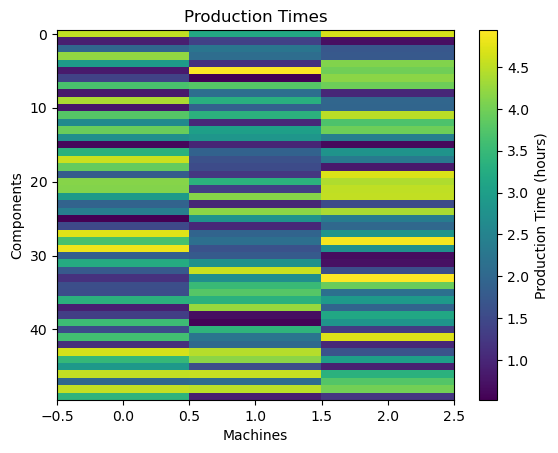

In [9]:
# Visualize Production Times
plt.imshow(production_times, cmap="viridis", aspect="auto")
plt.colorbar(label="Production Time (hours)")
plt.title("Production Times")
plt.xlabel("Machines")
plt.ylabel("Components")
plt.show()

In [10]:
# 4. Test: Gozinto Matrix
gozinto_matrix = generate_gozinto_factors()
print("\nGenerated Gozinto Matrix (components required per product):")
print(gozinto_matrix)


Generated Gozinto Matrix (components required per product):
[[2 4]
 [4 2]
 [3 4]
 [2 1]
 [3 1]
 [1 2]
 [4 2]
 [2 2]
 [2 3]
 [4 1]
 [1 4]
 [1 4]
 [1 2]
 [1 4]
 [4 4]
 [4 4]
 [3 3]
 [1 4]
 [1 4]
 [4 3]
 [3 2]
 [3 2]
 [2 2]
 [2 2]
 [1 3]
 [2 4]
 [3 3]
 [2 1]
 [2 1]
 [4 3]
 [4 1]
 [1 4]
 [1 4]
 [3 4]
 [3 4]
 [1 4]
 [1 4]
 [4 2]
 [1 2]
 [1 2]
 [3 4]
 [1 1]
 [4 1]
 [1 2]
 [1 3]
 [3 4]
 [1 4]
 [3 1]
 [1 4]
 [3 1]]


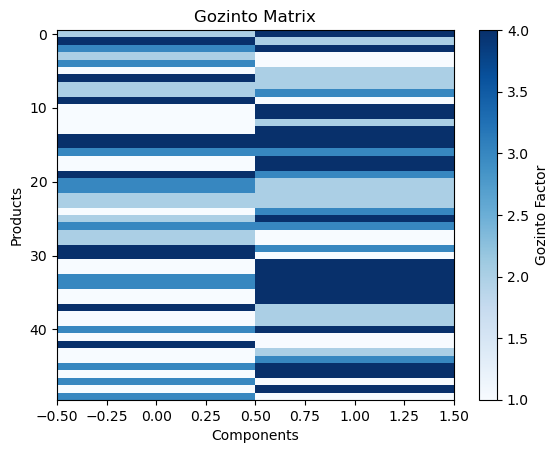

In [11]:
# Visualize Gozinto Matrix
plt.imshow(gozinto_matrix, cmap="Blues", aspect="auto")
plt.colorbar(label="Gozinto Factor")
plt.title("Gozinto Matrix")
plt.xlabel("Components")
plt.ylabel("Products")
plt.show()

In [12]:
component_costs = np.array(list(components.values()))

In [13]:
component_costs

array([4.37086107, 9.55642876, 7.58794548, 6.38792636, 2.40416776,
       2.40395068, 1.52275251, 8.79558531, 6.41003511, 7.3726532 ,
       1.18526045, 9.72918867, 8.49198377, 2.911052  , 2.6364247 ,
       2.65064059, 3.73818019, 5.72280788, 4.88750517, 3.62106226,
       6.50667605, 2.25544475, 3.62930184, 4.29725659, 5.10462986,
       8.06658365, 2.79706404, 5.62810995, 6.33173112, 1.41805371,
       6.46790367, 2.53471711, 1.58546434, 9.53996984, 9.6906883 ,
       8.27557613, 3.74152392, 1.87904903, 7.15809724, 4.96137244,
       2.09834411, 5.45659219, 1.30949669, 9.18388362, 3.32901983,
       6.96270056, 3.80539968, 5.68061219, 5.92039251, 2.6636901 ])

In [14]:
product_costs = np.dot(gozinto_matrix.T, component_costs)  # Corrected multiplication

In [15]:
product_costs

array([543.73751005, 685.85276807])

In [16]:
# 5. Test: Demand Simulation
price_sets = []
for i in range(10):  # Generate 5 price sets
    price_set = [np.random.uniform(cost + 5, cost + 1000) for cost in product_costs]
    price_sets.append(price_set)


In [17]:
price_sets = generate_price_sets(product_costs, n_sets=200)

In [18]:
price_sets

[[1456.9780626052466, 1197.1951669264572],
 [1045.2538047359749, 1484.1479470322947],
 [1193.7014408265404, 1387.8196453232229],
 [1339.5301794848763, 1575.8581098830857],
 [881.7326669003111, 1061.4357207054636],
 [637.7194498896444, 1264.1329090616935],
 [579.6797838455174, 1151.4507861979796],
 [1086.3821447563519, 972.394020193804],
 [1134.570770617786, 716.353018004569],
 [581.0856987979897, 1508.4533287251777],
 [903.9281514600382, 812.9132807174043],
 [1065.9807701035797, 1455.8463211641304],
 [759.5585375456185, 1308.7432438845199],
 [629.0849750425433, 737.5344892341272],
 [1075.0921416169233, 1226.487889675626],
 [1181.1674115469818, 1411.9441017881811],
 [1519.58958951131, 1202.1531163667148],
 [866.6939829900213, 1481.0389628342232],
 [814.5697613108496, 1124.8241887711556],
 [622.1938913910412, 711.203511480977],
 [1506.3859247267003, 1521.8328885777253],
 [1239.7117161424733, 1094.8057124797895],
 [717.0318301196211, 842.2898107366055],
 [793.9804082133707, 1235.079432771

In [19]:
NUM_SCENARIOS = 500

In [20]:
scenario_steps = np.arange(10, NUM_SCENARIOS + 1, 10)


In [21]:
costs = np.dot(gozinto_matrix.T, component_costs)  # Minimum production costs per product

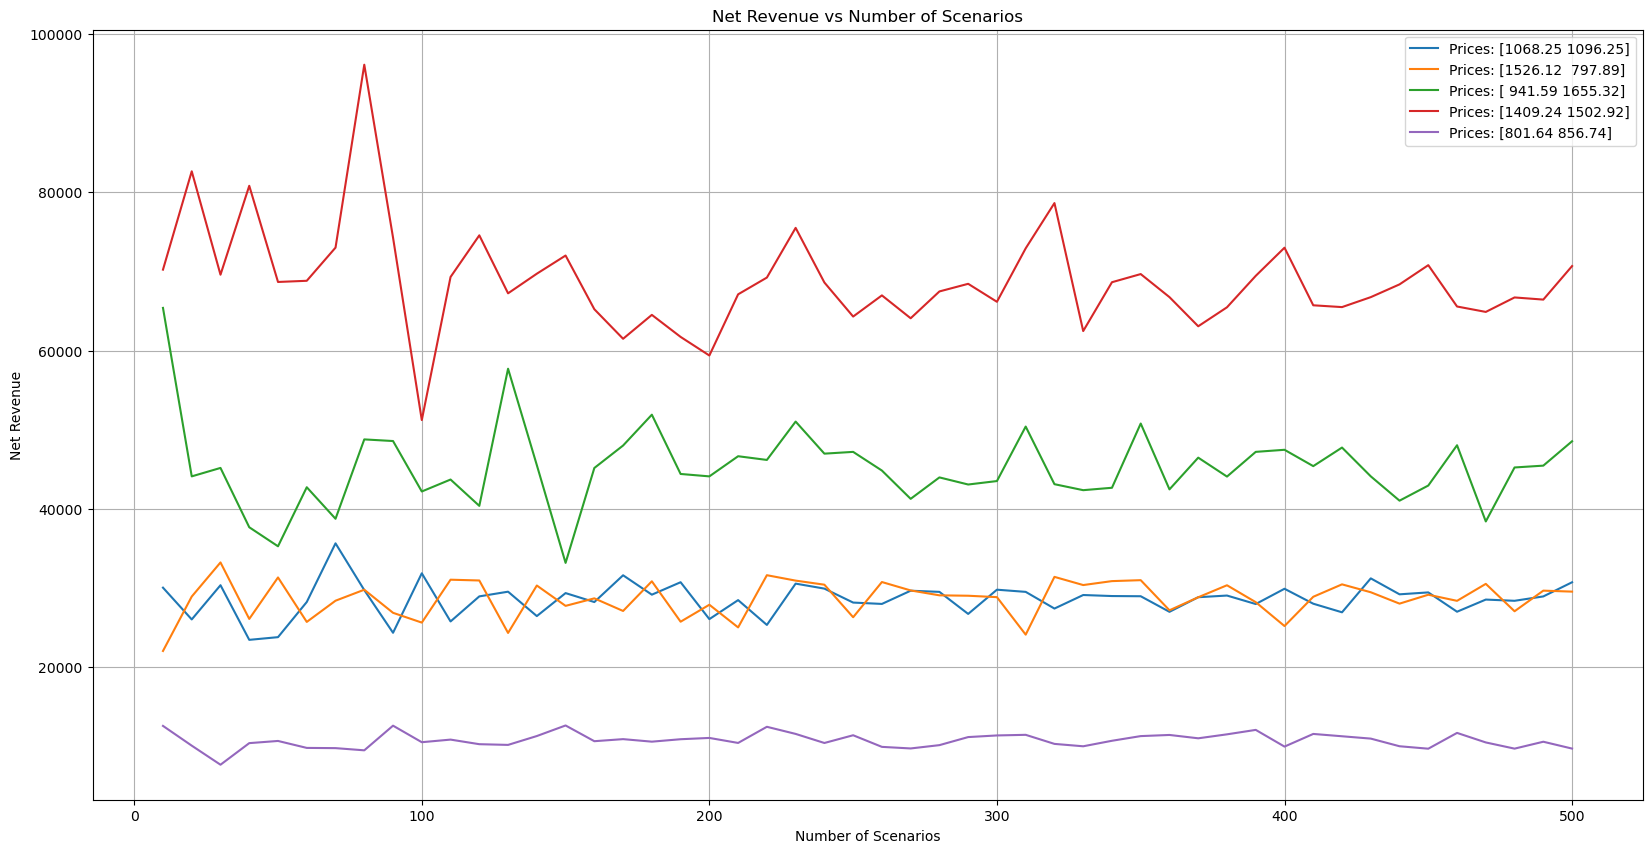

In [22]:
run_simulation(gozinto_matrix, component_costs, costs, scenario_steps,NUM_PRODUCTS, n_price_sets=5)

In [23]:
# Step 2: Generate demand scenarios with cross-price elasticity
demand_scenarios = generate_demand_scenarios(price_sets, noise_std=10)

# Step 3: Save demand data to CSV
save_demand_data_to_csv(demand_scenarios, price_sets)

Demand data saved for Product 1 at demand_data/../data/product_1_demand.csv
Demand data saved for Product 2 at demand_data/../data/product_2_demand.csv


In [24]:
# Step 1: Load demand data from CSV files
demand_data = load_demand_data(output_folder="data")


Loaded demand data for Product 1 from data/product_1_demand.csv
Loaded demand data for Product 2 from data/product_2_demand.csv


In [25]:
# Step 2: Perform stability test
stability_results = perform_stability_test(demand_data, NUM_SCENARIOS)


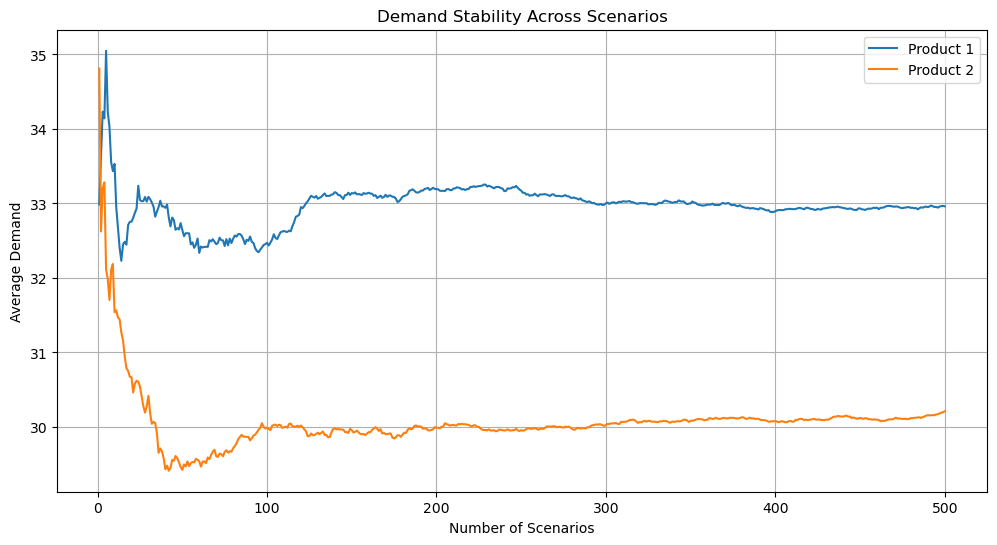

In [26]:
# Step 3: Plot stability results
plot_stability_results(stability_results, NUM_SCENARIOS)

# TEST THE MODELS

In [5]:
run_pipeline()

Running model: Linear Demand
Saved results for Linear Demand to results/linear_demand_demands.csv
Running model: Cross-Price Demand
Saved results for Cross-Price Demand to results/cross-price_demand_demands.csv
Running model: Logit Demand
Saved results for Logit Demand to results/logit_demand_demands.csv
Skipping logit_demand_demands.csv: Missing required columns.
Skipping linear_demand_demands.csv: Missing required columns.
Skipping cross-price_demand_demands.csv: Missing required columns.
Skipping market_share_demand_demands.csv: Missing required columns.
Pipeline execution completed.


Loaded Logit Demand data from results/logit_demand_demands.csv
Loaded Linear Demand data from results/linear_demand_demands.csv
Loaded Cross-Price Demand data from results/cross-price_demand_demands.csv
Loaded Market Share Demand data from results/market_share_demand_demands.csv

Analyzing Logit Demand...

Summary for Logit Demand:

            count        mean         std        min        25%         50%  \
Product                                                                       
1        100000.0  702.820494  442.038813 -19.204247  16.598179  996.235787   
2        100000.0  297.178870  441.993369 -21.362931  -1.379108    3.784090   

                 75%          max  
Product                            
1        1001.451661  1022.497245  
2         983.589847  1023.106645  


/Users/piercest/ATOdemandAnalysis/tests/model_test.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Product")


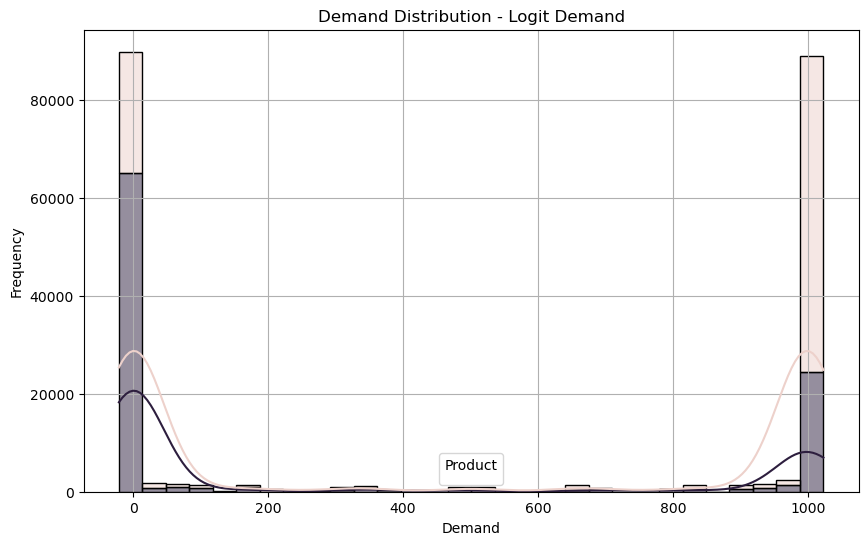

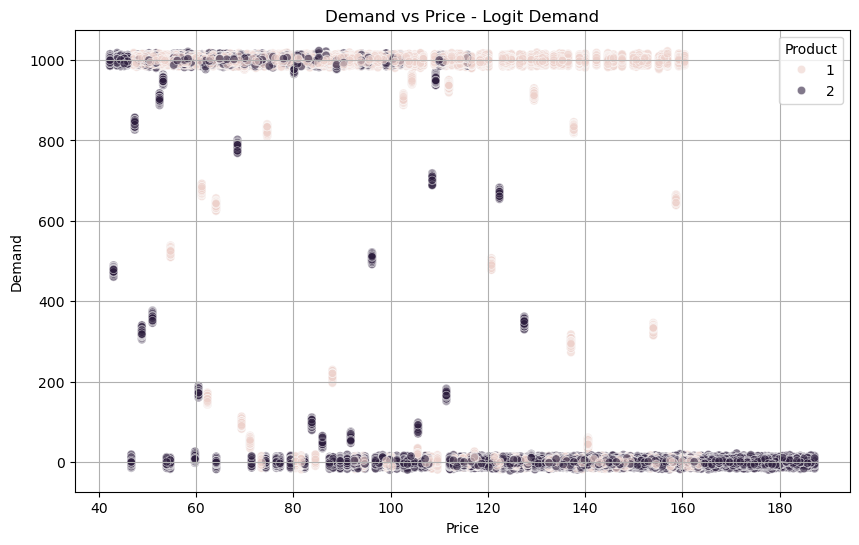

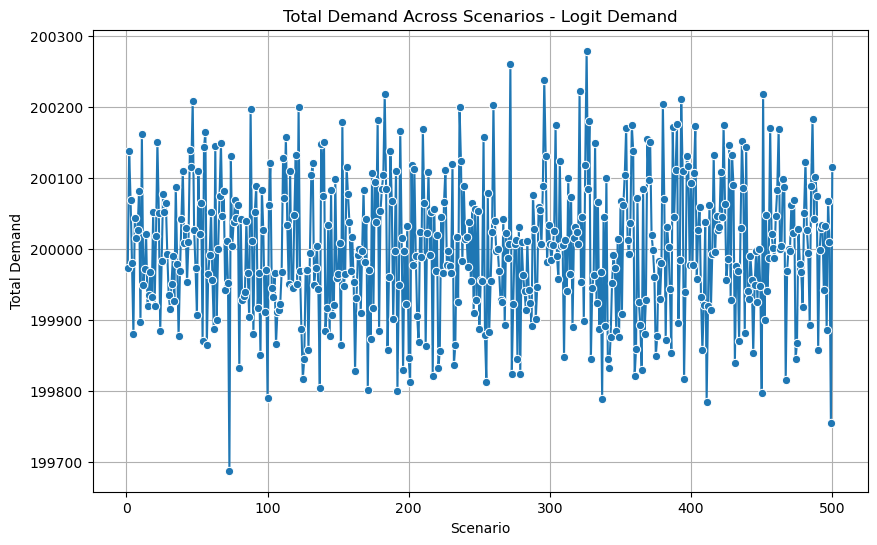

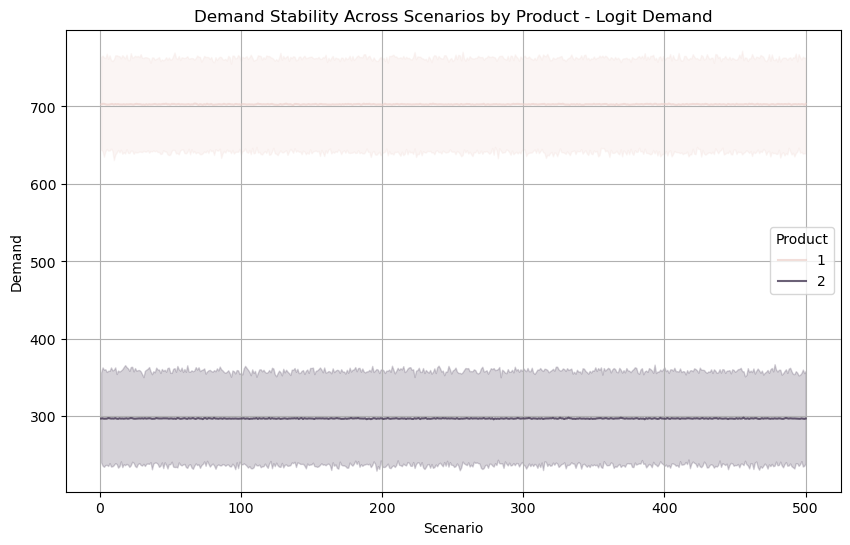


Analyzing Linear Demand...

Summary for Linear Demand:

            count        mean        std        min         25%         50%  \
Product                                                                       
1        100000.0   29.226993  24.665312    0.00000    3.014544   26.727280   
2        100000.0  238.862512  42.705944  145.31267  202.097256  238.814892   

                75%         max  
Product                          
1         50.574296   89.256313  
2        275.493266  326.651143  


/Users/piercest/ATOdemandAnalysis/tests/model_test.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Product")


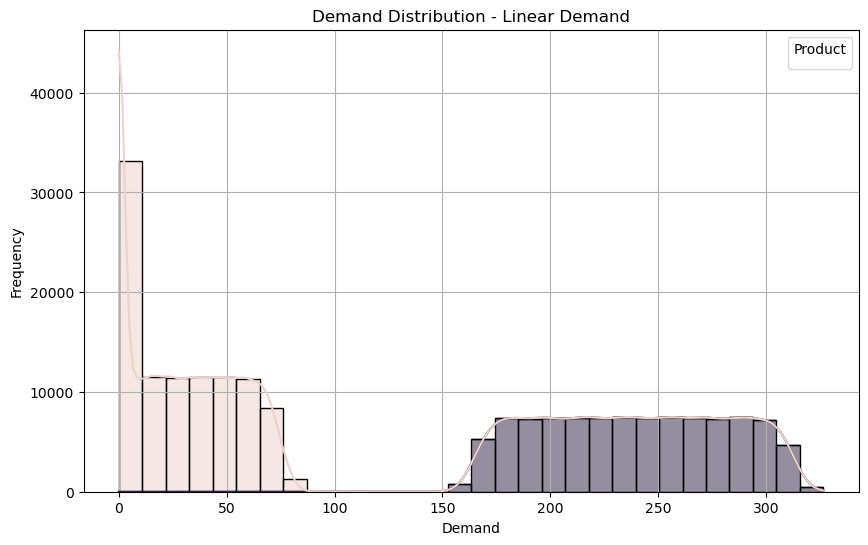

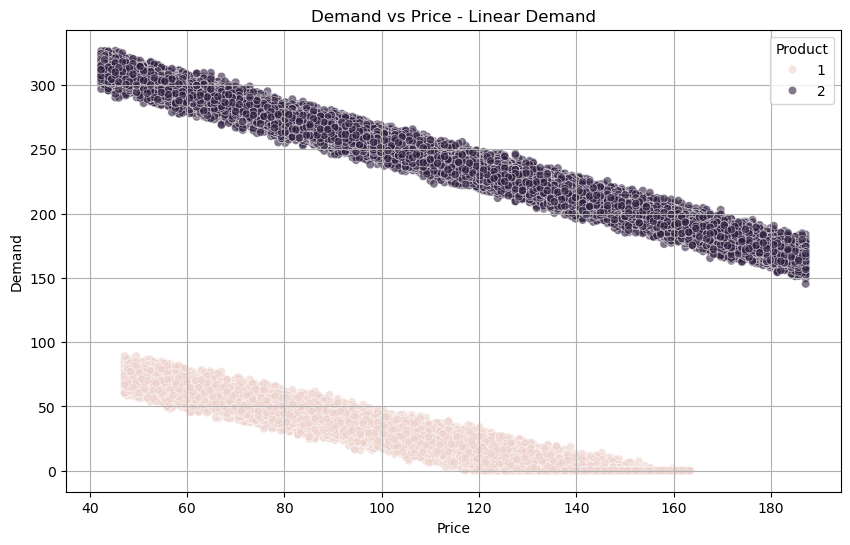

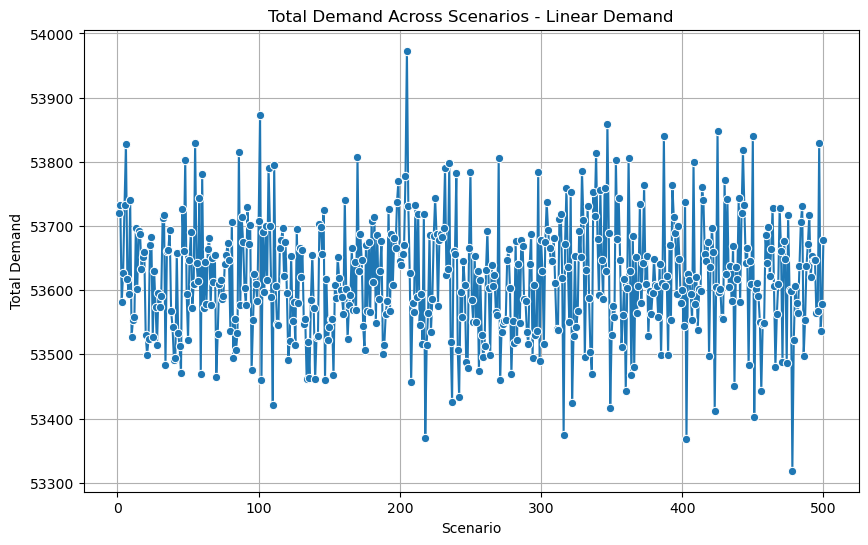

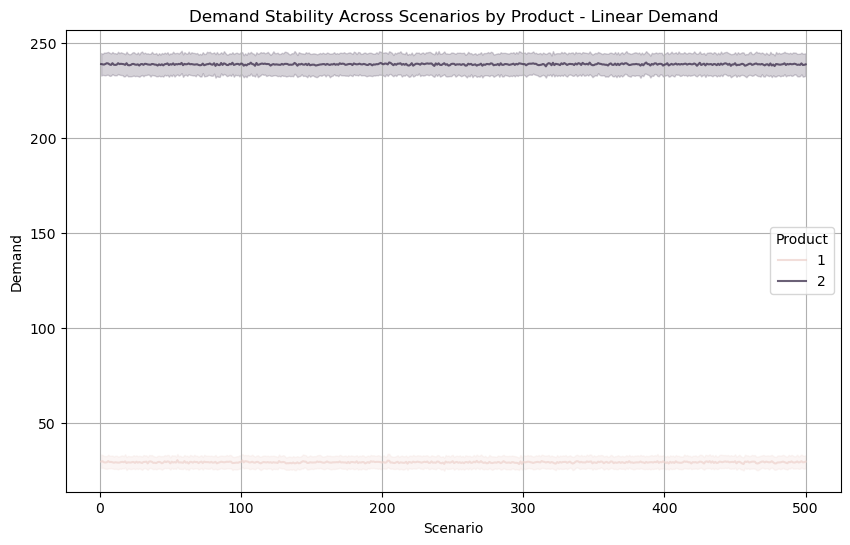


Analyzing Cross-Price Demand...

Summary for Cross-Price Demand:

            count        mean        std         min         25%         50%  \
Product                                                                        
1        100000.0    0.590576   3.152742    0.000000    0.000000    0.000000   
2        100000.0  248.407768  32.687907  175.245538  221.510558  248.049578   

                75%         max  
Product                          
1          0.000000   39.528927  
2        275.177482  327.523260  


/Users/piercest/ATOdemandAnalysis/tests/model_test.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Product")


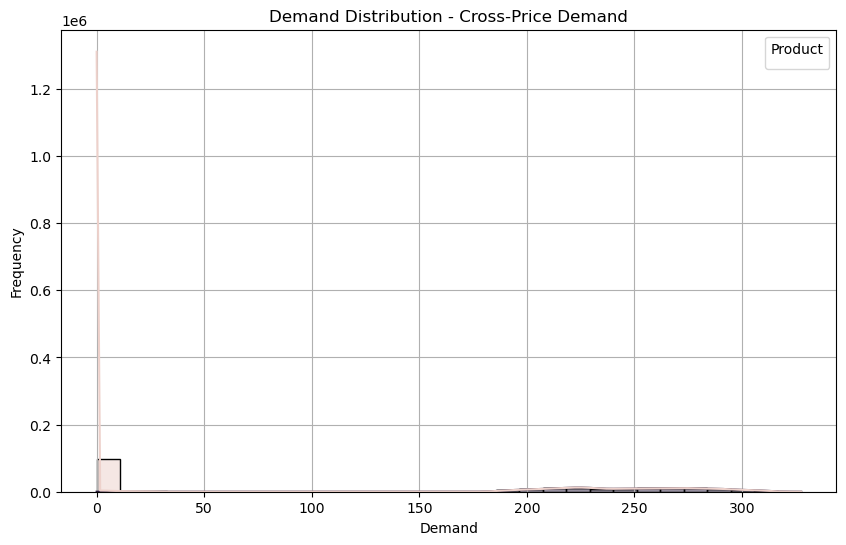

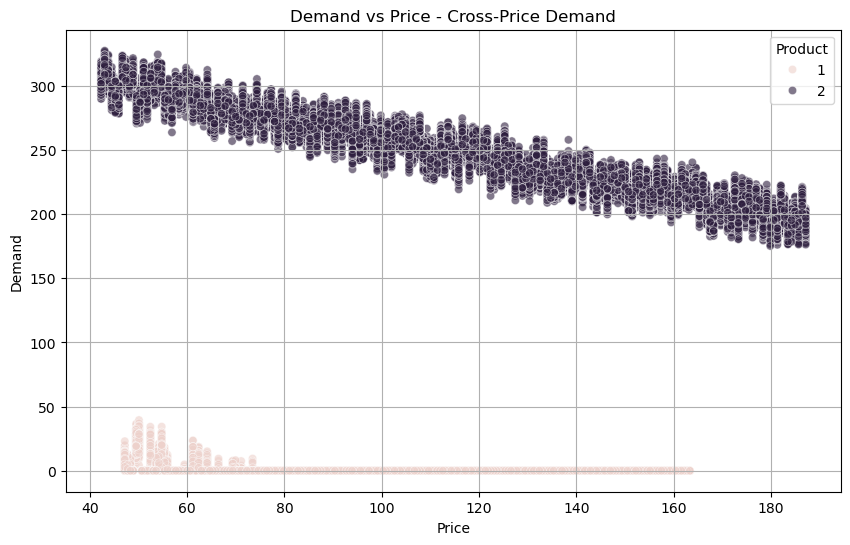

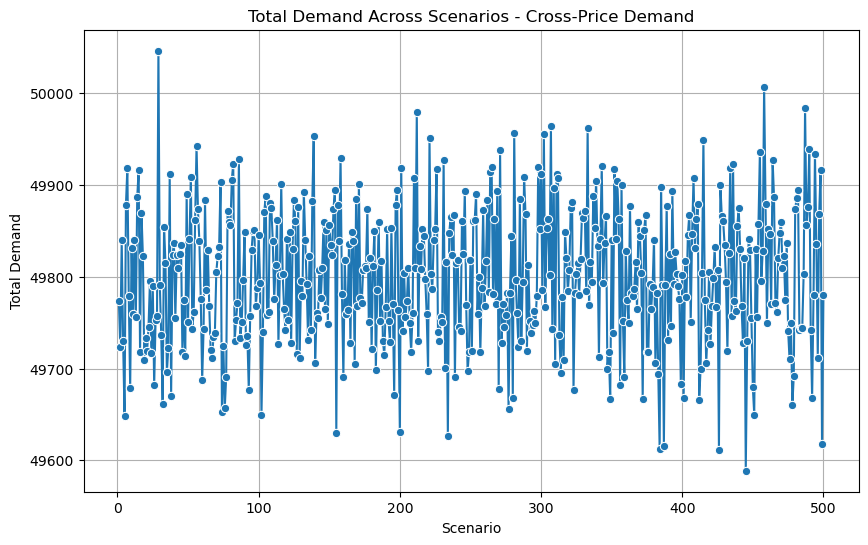

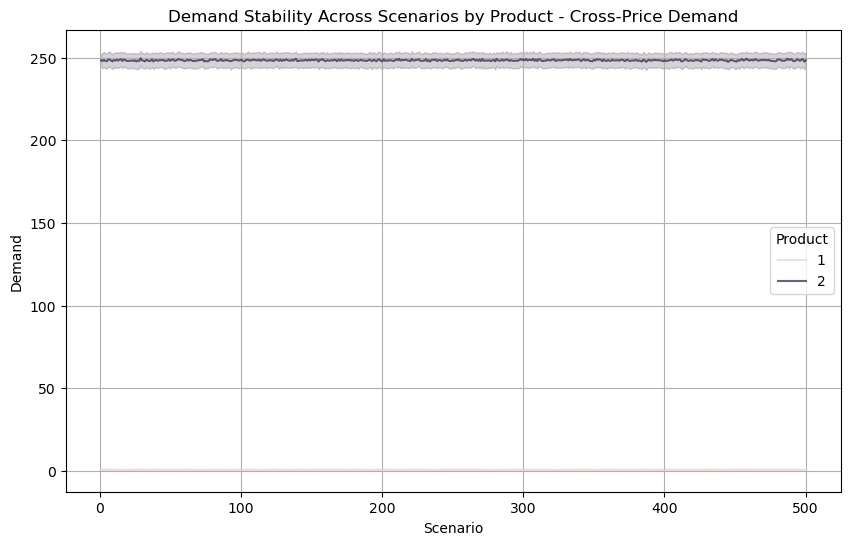


Analyzing Market Share Demand...

Summary for Market Share Demand:

            count         mean         std          min          25%  \
Product                                                                
1        100000.0  4293.660701  786.990388  2633.206365  3705.451502   
2        100000.0  4197.158175  787.000543  2434.362259  3622.874001   

                 50%          75%          max  
Product                                         
1        4263.370048  4867.165190  6062.517314  
2        4227.689835  4785.114521  5856.019776  


/Users/piercest/ATOdemandAnalysis/tests/model_test.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Product")


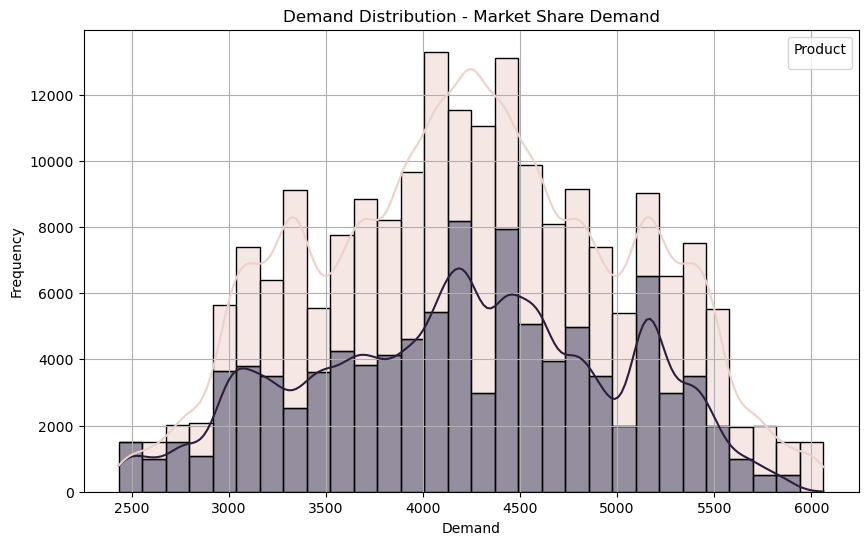

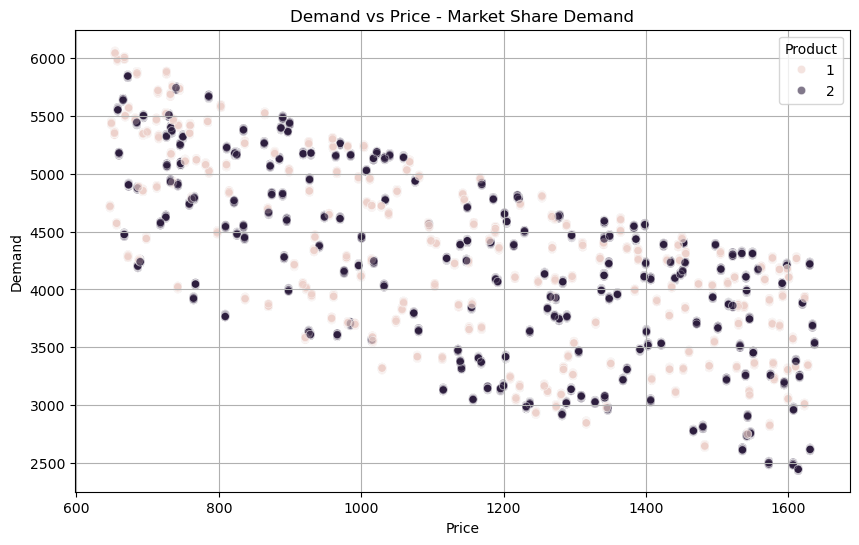

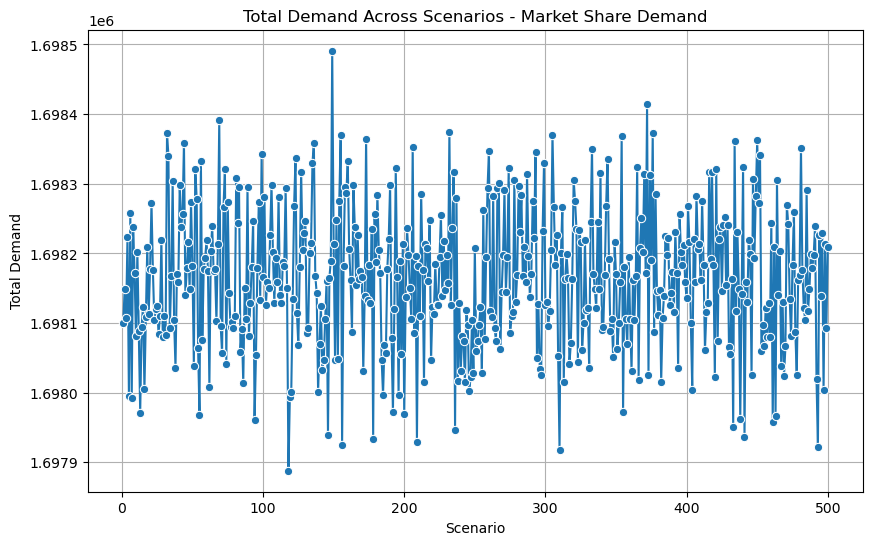

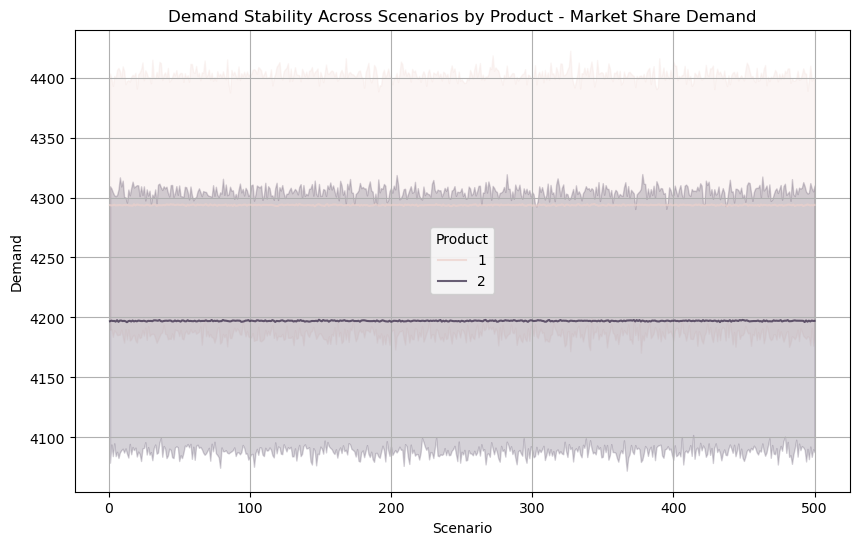


Comparing models for Product 1...


/Users/piercest/ATOdemandAnalysis/tests/model_test.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data["Model"] = model_name


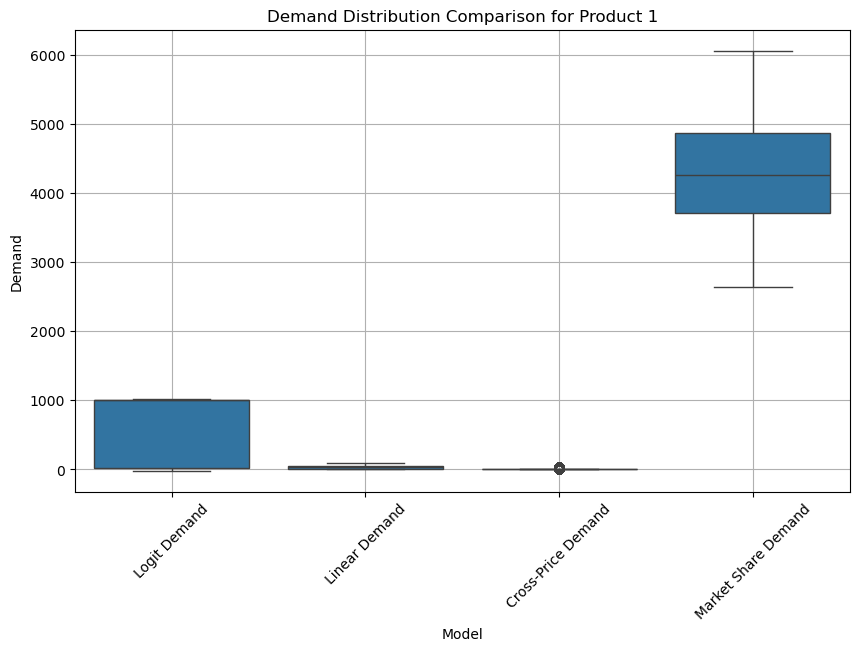

In [7]:
analyze_csv_files(folder="results")

In [9]:
run_stability_analysis()

NameError: name 'run_stability_analysis' is not defined

# Pipeline generator

In [5]:
components = generate_components()  # Generates component names and costs
component_costs = np.array(list(components.values()))  # Extract costs as a numpy array

In [7]:
components

{'Component_1': 2.49816047538945,
 'Component_2': 4.802857225639665,
 'Component_3': 3.9279757672456204,
 'Component_4': 3.3946339367881464,
 'Component_5': 1.624074561769746,
 'Component_6': 1.6239780813448106,
 'Component_7': 1.2323344486727978,
 'Component_8': 4.46470458309974,
 'Component_9': 3.404460046972835,
 'Component_10': 3.832290311184182}

In [9]:
gozinto_matrix = generate_gozinto_factors()  # Rows: components, Columns: products


In [11]:
gozinto_matrix

array([[2, 1],
       [2, 4],
       [4, 2],
       [2, 2],
       [4, 4],
       [1, 1],
       [4, 2],
       [2, 1],
       [4, 1],
       [1, 3]])

In [13]:
num_price_sets = 10

In [15]:
manufacturing_costs = gozinto_matrix.T @ component_costs

In [17]:
manufacturing_costs

array([76.53236013, 66.30578958])

In [127]:
low_prices = [np.random.uniform(cost, cost * 2) for cost in manufacturing_costs]
high_prices = [np.random.uniform(cost * 2, cost * 5) for cost in manufacturing_costs]

In [129]:
low_prices

[88.49393673145747, 131.9423723512711]

In [131]:
high_prices

[168.72286858387494, 220.78318906038743]

In [133]:
def lhs(n, samples):
    """
    Generate a Latin Hypercube Sample (LHS) for `n` dimensions and the specified number of samples.
    """
    result = np.zeros((samples, n))
    for i in range(n):
        result[:, i] = np.random.permutation(np.linspace(0, 1, samples))
    return result

In [135]:
def generate_price_sets(price_min, price_max, num_samples):
    """
    Generate price sets using a custom Latin Hypercube Sampling implementation.
    """
    num_products = len(price_min)
    samples = lhs(num_products, samples=num_samples)
    price_sets = samples * (np.array(price_max) - np.array(price_min)) + np.array(price_min)
    return price_sets

In [137]:
price_sets = generate_price_sets(low_prices, high_prices, num_price_sets)

In [31]:
price_sets

array([[108.3320339 , 118.69323463],
       [167.03683899,  90.03554277],
       [158.65043826, 109.14067067],
       [141.87763681, 137.79836253],
       [133.49123608, 156.90349044],
       [175.42323972,  70.93041486],
       [ 99.94563318,  99.58810672],
       [125.10483536,  80.48297881],
       [150.26403754, 128.24579858],
       [116.71843463, 147.35092649]])

In [987]:
import numpy as np

def independent_price_demand(prices):
    """
    Computes demands for multiple products whose model parameters (base_demand,
    sensitivity, sigma) are drawn randomly each time this function is called.

    D_i = base_demand_i - sensitivity_i * price_i + epsilon_i

    where epsilon_i ~ Normal(0, sigma_i^2).

    Parameters
    ----------
    prices : np.array
        A 1D NumPy array of prices (one per product).

    Returns
    -------
    np.array
        A 1D NumPy array of demands for each product in 'prices'.
    """
    
    # 1. Randomly generate base demands (e.g., between 100 and 300)
    base_demand = np.random.uniform(200, 400, size = NUM_PRODUCTS)

    # 2. Randomly generate sensitivities (e.g., between 1 and 5)
    sensitivity = np.random.uniform(1, 5, size = NUM_PRODUCTS)

    # 3. Randomly generate sigma (std dev of noise) (e.g., between 5 and 15)
    sigma = np.random.uniform(5, 15, size = NUM_PRODUCTS)

    # Generate a random noise term for each product
    # eps_i ~ Normal(0, sigma_i^2)
    epsilon = np.random.normal(0, sigma, size = NUM_PRODUCTS)

    # Compute demand for each product:
    # D_i = base_demand[i] - sensitivity[i] * prices[i] + epsilon[i]
    demand = base_demand - sensitivity * prices + epsilon

    demand = np.maximum(demand, 0)

    return demand


In [979]:
independent_price_demand(price_sets)

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 6.03926396,  0.        ],
       [41.29995191,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [857]:
price_sets

array([[165.68945195,  78.45174522],
       [187.96883254, 137.46371522],
       [143.41007135, 102.05653322],
       [176.82914225, 149.26610922],
       [121.13069075, 113.85892722],
       [ 98.85131016, 161.06850323],
       [ 87.71161986, 125.66132122],
       [132.27038105,  90.25413922],
       [154.54976165, 172.87089723],
       [109.99100046, 184.67329123]])

In [859]:
def generate_scenarios(prices, n_scenarios):
    """
    Generates multiple demand scenarios for a given set of prices.

    Parameters
    ----------
    prices : np.array
        A 1D NumPy array of prices (one per product).
    n_scenarios : int
        Number of scenarios to generate.

    Returns
    -------
    np.ndarray
        A 2D array of shape (n_scenarios, n_products), where each row is 
        the demand realization for one scenario.
    """
    # Initialize a list (or array) to store scenario demands
    scenario_demands = []

    for _ in range(n_scenarios):
        # Call your existing function to get one scenario of demand
        demand_vector = independent_price_demand(prices)
        scenario_demands.append(demand_vector)

    # Convert the list of demands to a 2D NumPy array
    # Shape will be (n_scenarios, num_products)
    return np.array(scenario_demands)

In [861]:
scenario_demands = generate_scenarios(price_sets,500)

In [863]:
scenario_demands[499][0]

array([0., 0.])

In [865]:
def compute_revenues_for_all_price_sets(price_matrix, scenario_demands_matrix, manufacturing_costs):
    """
    Computes the revenue for each price set, following the steps:
      1) For each price set i, compute the average (expected) demand across its scenarios.
      2) For each product j, calculate revenue_j = (avg_demand[j] * price_matrix[i,j]) - manufacturing_costs[j].
      3) Sum revenue_j over all products j.
      4) Repeat for each price set.

    Parameters
    ----------
    price_matrix : np.ndarray
        Shape (n_price_sets, n_products)
        - Each row is a set of prices for all products.
    scenario_demands_matrix : np.ndarray
        Shape (n_price_sets, n_scenarios, n_products)
        - scenario_demands_matrix[i, :, :] corresponds to the demands in all
          scenarios for the i-th price set.
    manufacturing_costs : np.ndarray
        Shape (n_products,)
        - manufacturing_costs[j] is the cost per unit for product j.

    Returns
    -------
    np.ndarray
        A 1D array of length n_price_sets, where each element is the total revenue
        (summed across products) for the corresponding price set.
    """
    n_price_sets = price_matrix.shape[0]
    revenues = np.zeros(n_price_sets)

    for i in range(n_price_sets):
        # (1) Compute the average demand across scenarios for this price set
        # scenario_demands_matrix[i] -> shape (n_scenarios, n_products)
        avg_demand = np.mean(scenario_demands_matrix[i], axis=0)  # shape (n_products,)

        # (2) For each product j, compute revenue_j = (avg_demand[j] * price[i,j]) - cost[j]
        # We'll do that vectorized in one line:
        product_revenues = (avg_demand * price_matrix[i]) - manufacturing_costs

        # (3) Sum across products
        total_revenue = np.sum(product_revenues)

        # Store the revenue for price set i
        revenues[i] = total_revenue

    return revenues


In [867]:
compute_revenues_for_all_price_sets(price_sets,scenario_demands,manufacturing_costs)

array([   88.55304009, 12212.73645257,   309.07908896, 12017.26059256,
         684.99607436,  7894.16264991,  -142.83814971, 15400.48288946,
       11667.25127338, 20936.74697905])

# Simulation

In [139]:
def lhs(n, samples):
    """
    Generate a Latin Hypercube Sample (LHS) for `n` dimensions 
    and the specified number of samples.
    
    Parameters
    ----------
    n : int
        Number of dimensions (i.e., number of variables).
    samples : int
        Number of samples to generate.

    Returns
    -------
    np.ndarray
        A 2D array of shape (samples, n). Each column is a permutation
        of evenly spaced points in [0, 1].
    """
    result = np.zeros((samples, n))
    for i in range(n):
        result[:, i] = np.random.permutation(np.linspace(0, 1, samples))
    return result

def generate_price_sets(price_min, price_max, num_samples):
    """
    Generate price sets using a custom Latin Hypercube Sampling implementation.

    Parameters
    ----------
    price_min : list or np.ndarray
        The minimum price for each product.
    price_max : list or np.ndarray
        The maximum price for each product.
    num_samples : int
        Number of price sets to generate.

    Returns
    -------
    np.ndarray
        A 2D array of shape (num_samples, num_products).
    """
    num_products = len(price_min)
    # Generate LHS samples
    samples = lhs(num_products, samples=num_samples)
    # Scale the LHS samples to the [price_min, price_max] range
    price_sets = samples * (np.array(price_max) - np.array(price_min)) + np.array(price_min)
    return price_sets

def independent_price_demand(prices):
    """
    Computes independent demands for each product based on a linear model with noise:
    D_i = base_demand_i - sensitivity_i * price_i + epsilon_i,
    where epsilon_i ~ Normal(0, sigma_i^2).

    Parameters
    ----------
    prices : np.array
        A 1D NumPy array of prices (one per product).

    Returns
    -------
    np.array
        A 1D NumPy array of demands (>= 0) for each product in 'prices'.
    """
    n_products = len(prices)

    # 1. Randomly generate base demands (e.g., between 200 and 400)
    base_demand = np.random.uniform(200, 400, size=n_products)

    # 2. Randomly generate sensitivities (e.g., between 1 and 5)
    sensitivity = np.random.uniform(1, 5, size=n_products)

    # 3. Randomly generate sigma (std dev of noise) (e.g., between 5 and 15)
    sigma = np.random.uniform(5, 15, size=n_products)

    # 4. Generate random noise term for each product
    epsilon = np.random.normal(0, sigma, size=n_products)

    # 5. Compute demand
    demand = base_demand - sensitivity * prices + epsilon

    # Ensure demand is non-negative
    demand = np.maximum(demand, 0)
    return demand

def generate_scenarios(prices, n_scenarios):
    """
    Generates multiple demand scenarios for a given set of prices.

    Parameters
    ----------
    prices : np.array
        A 1D NumPy array of prices (one per product).
    n_scenarios : int
        Number of scenarios to generate.

    Returns
    -------
    np.ndarray
        A 2D array of shape (n_scenarios, n_products).
        Each row is a random demand realization for the given prices.
    """
    scenario_demands = []
    for _ in range(n_scenarios):
        demand_vector = independent_price_demand(prices)
        scenario_demands.append(demand_vector)
    return np.array(scenario_demands)

def compute_revenues_for_all_price_sets(price_matrix, scenario_demands_matrix, manufacturing_costs):
    """
    Computes the revenue for each price set across multiple scenarios.

    Parameters
    ----------
    price_matrix : np.ndarray
        Shape (n_price_sets, n_products).
        Each row is a set of prices for all products.
    scenario_demands_matrix : np.ndarray
        Shape (n_price_sets, n_scenarios, n_products).
        scenario_demands_matrix[i] corresponds to all scenarios for
        the i-th price set.
    manufacturing_costs : np.ndarray
        Shape (n_products,).
        manufacturing_costs[j] is the cost per unit for product j.

    Returns
    -------
    np.ndarray
        A 1D array of length n_price_sets, where each element is the 
        total expected revenue for that price set.
    """
    n_price_sets = price_matrix.shape[0]
    revenues = np.zeros(n_price_sets)

    for i in range(n_price_sets):
        # (1) Average demand across scenarios
        avg_demand = np.mean(scenario_demands_matrix[i], axis=0)

        # (2) Per-product revenue = avg_demand[j] * price_matrix[i, j] - manufacturing_costs[j]
        product_revenues = (avg_demand * price_matrix[i]) - manufacturing_costs

        # (3) Sum across products
        revenues[i] = np.sum(product_revenues)

    return revenues

# ---------------------------
# Simulation / Driver Functions
# ---------------------------

def run_simulation(
    price_min, price_max, 
    manufacturing_costs, 
    num_price_samples, 
    scenario_steps
):
    """
    Runs a simulation of generating price sets, creating demand scenarios,
    and computing revenues for each price set across multiple scenario steps.

    Parameters
    ----------
    price_min : list or np.ndarray
        Minimum price for each product.
    price_max : list or np.ndarray
        Maximum price for each product.
    manufacturing_costs : list or np.ndarray
        Unit manufacturing cost for each product.
    num_price_samples : int
        Number of distinct price sets to generate.
    scenario_steps : list of int
        List of scenario counts to test (e.g., [10, 50, 100]).

    Returns
    -------
    tuple
        (price_sets, revenues_matrix),
        where:
          - price_sets is the array of generated prices (shape: (num_price_samples, num_products)).
          - revenues_matrix is a 2D array of shape (len(scenario_steps), num_price_samples),
            where revenues_matrix[s, i] is the expected revenue for price set i
            when using scenario_steps[s] demand scenarios.
    """
    # 1. Generate all price sets
    price_sets = generate_price_sets(price_min, price_max, num_price_samples)

    # 2. Prepare a list to store the revenue arrays (one array per scenario step)
    all_revenues = []

    # 3. For each number of scenarios, generate scenario demands and compute revenues
    for n_scenarios in scenario_steps:
        # scenario_demands_matrix will have shape (n_price_sets, n_scenarios, n_products)
        scenario_demands_matrix = np.array([
            generate_scenarios(price_sets[i], n_scenarios)
            for i in range(num_price_samples)
        ])

        # Compute total revenues for each price set
        revenues = compute_revenues_for_all_price_sets(
            price_matrix=price_sets,
            scenario_demands_matrix=scenario_demands_matrix,
            manufacturing_costs=np.array(manufacturing_costs)
        )

        # Store the full vector of revenues for this scenario count
        all_revenues.append(revenues)

    # Convert list of arrays into a 2D NumPy array: shape = (len(scenario_steps), num_price_samples)
    revenues_matrix = np.array(all_revenues)
    return price_sets, revenues_matrix

In [141]:
np.random.seed(42)
scenario_steps = [10, 50, 100, 200 ,300 , 400 ,500]
# Run the simulation
price_sets, revenues_by_step = run_simulation(
    price_min=low_prices,
    price_max=high_prices,
    manufacturing_costs=manufacturing_costs,
    num_price_samples=100,
    scenario_steps=scenario_steps
    )


In [142]:
revenues_by_step

array([[ 3401.33458579,  8107.10589534,  2961.18550501, 13332.79471235,
         8213.82654558,  8058.8892758 ,  4816.38902865,  3947.59994862,
         8119.56497113,  9890.03284344,  8044.81995541,  9838.88914896,
         2214.3250351 ,  4402.05327525,  8383.75789935, 11616.19717068,
         5825.81007602,  2241.68520093,  8794.55463553, 15071.59957719,
         2724.60324417,  5650.63945984,  7536.54342066,  3299.44212876,
         9828.89120884,  4864.6116201 ,  8117.38348305,  6448.13251404,
         5769.85350037,  6957.2083999 , 10360.02011213,  3082.62977929,
         6818.34565153,  1751.27929613,  1466.51137878,  6547.78929614,
         7737.11491162,  3770.00976169,  6857.92428385,  6547.84057176,
         4655.34110662, 10048.77866419,  5386.08458023,  2254.37411591,
        10659.76828584,  9024.14244727,  4229.67173874,  9753.57889086,
         4879.09313744,  5274.07022728,  4916.05342634,  9188.6690149 ,
         5438.45342775,  6175.10114458,  6515.33219747,  2692.70

In [145]:
import numpy as np
import matplotlib.pyplot as plt

np.random

def plot_revenues_by_price_set(scenario_steps, revenues_matrix):
    """
    Plots revenue vs. number of scenarios for each price set in a more stylish manner.
    
    Parameters
    ----------
    scenario_steps : list or array-like
        The list of different scenario counts (x-axis).
    revenues_matrix : np.ndarray
        A 2D array of shape (len(scenario_steps), num_price_sets).
        Each row corresponds to a scenario step; each column is a different price set.
    """
    # Use a built-in style, e.g., "ggplot"
    plt.style.use('ggplot')
    
    plt.figure(figsize=(20, 12))
    
    num_price_sets = revenues_matrix.shape[1]
    colors = plt.cm.tab10(np.linspace(0, 1, num_price_sets))

    for i in range(num_price_sets):
        plt.plot(
            scenario_steps,
            revenues_matrix[:, i],
            label=f'Price Set #{i + 1}',
            color=colors[i % len(colors)],
            marker='o',
            linewidth=2,
            markersize=6
        )

    plt.title('Revenue per Price Set vs. Number of Scenarios', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Scenarios', fontsize=12)
    plt.ylabel('Revenue', fontsize=12)
    
    plt.grid(True, which='major', linestyle='--', alpha=0.7)
    plt.legend(loc='best', fontsize=10)
    plt.tight_layout()
    plt.show()

/var/folders/m4/3q70nsbn5rxc245sspjv5lgr0000gn/T/ipykernel_14756/2714296680.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


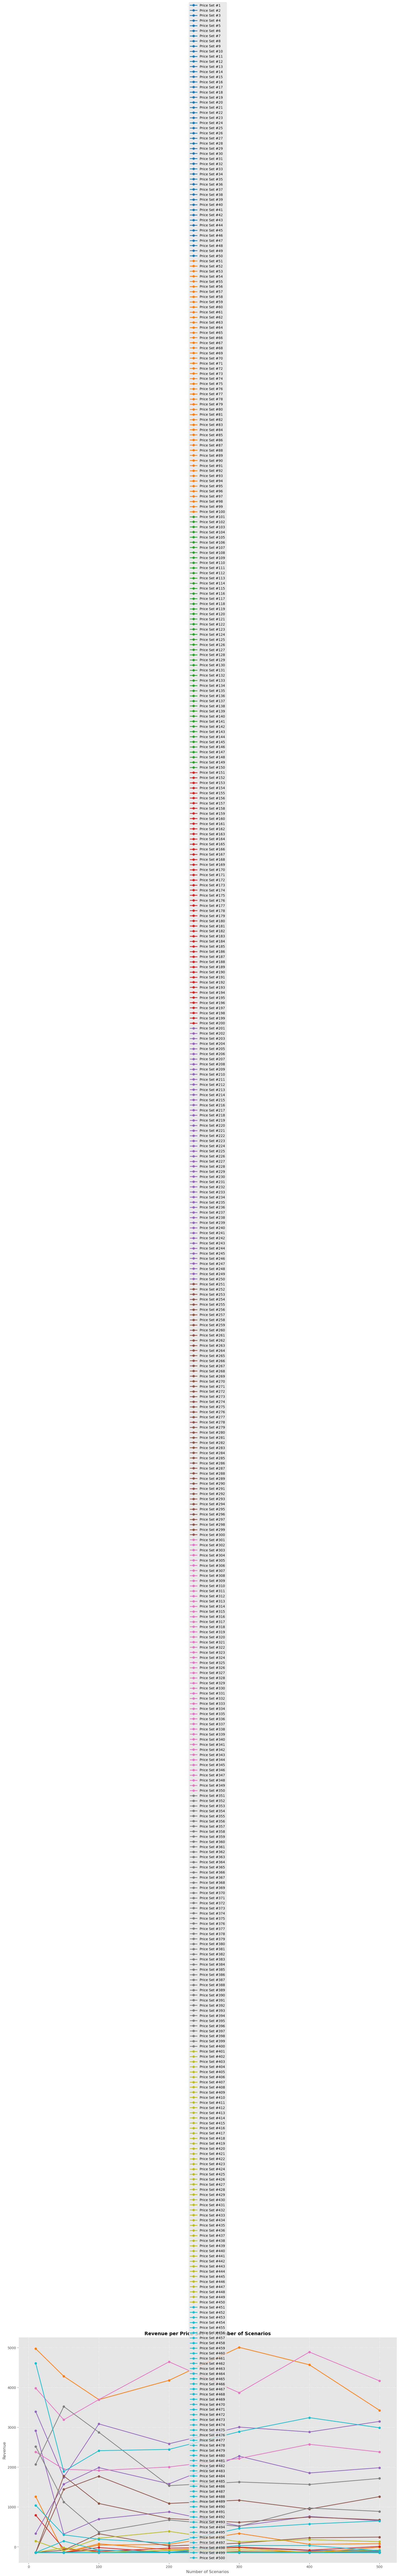

In [71]:
plot_revenues_by_price_set(scenario_steps, revenues_by_step)

In [147]:
import pandas as pd
import numpy as np

def compute_revenues_from_cut(scenario_demands_matrix, price_sets, manufacturing_costs, start_index):
    """
    Computes the revenue for each price set after cutting the first `start_index` scenarios.

    Parameters
    ----------
    scenario_demands_matrix : np.ndarray
        Shape (n_price_sets, n_scenarios, n_products).
        Scenario demands for each price set.
    price_sets : np.ndarray
        Shape (n_price_sets, n_products).
        Each row is a set of prices for all products.
    manufacturing_costs : np.ndarray
        Manufacturing costs per unit for each product.
    start_index : int
        Number of initial scenarios to cut off.

    Returns
    -------
    np.ndarray
        A 1D array containing the average revenue for each price set after cutting scenarios.
    """
    n_price_sets = price_sets.shape[0]
    adjusted_revenues = np.zeros(n_price_sets)

    for i in range(n_price_sets):
        # Slice scenarios to start from start_index
        remaining_demands = scenario_demands_matrix[i, start_index:]
        
        # Average demand across remaining scenarios
        avg_demand = np.mean(remaining_demands, axis=0)

        # Compute revenue per product and sum up for total revenue
        product_revenues = (avg_demand * price_sets[i]) - manufacturing_costs
        adjusted_revenues[i] = np.sum(product_revenues)
    
    return adjusted_revenues

def create_revenue_dataframe(price_sets, adjusted_revenues):
    """
    Creates a DataFrame containing price sets and their corresponding revenues.

    Parameters
    ----------
    price_sets : np.ndarray
        A 2D array where each row is a price set.
    adjusted_revenues : np.ndarray
        A 1D array containing revenues corresponding to each price set.

    Returns
    -------
    pd.DataFrame
        DataFrame with columns for each price in the set and revenues.
    """
    # Create column names for each price in the set
    column_names = [f'P{i+1}' for i in range(price_sets.shape[1])]
    
    # Create the DataFrame with expanded price set columns
    df = pd.DataFrame(price_sets, columns=column_names)
    
    # Add the revenues column
    df['Revenue'] = adjusted_revenues
    
    return df

# Updated Simulation Function
def run_adjusted_simulation(
    price_min, price_max, 
    manufacturing_costs, 
    num_price_samples, 
    scenario_steps, 
    cut_n
):
    """
    Runs the simulation with the capability to cut initial scenarios and compute
    average revenues over remaining scenarios.

    Parameters
    ----------
    price_min : list or np.ndarray
        Minimum price for each product.
    price_max : list or np.ndarray
        Maximum price for each product.
    manufacturing_costs : list or np.ndarray
        Manufacturing costs per product.
    num_price_samples : int
        Number of price sets to generate.
    scenario_steps : int
        Total number of scenarios to generate.
    cut_n : int
        Number of initial scenarios to cut off.

    Returns
    -------
    pd.DataFrame
        DataFrame with price sets and their average revenues.
    """
    # Generate price sets
    price_sets = generate_price_sets(price_min, price_max, num_price_samples)

    # Generate scenario demands
    scenario_demands_matrix = np.array([
        generate_scenarios(price_sets[i], scenario_steps)
        for i in range(num_price_samples)
    ])

    # Compute adjusted revenues
    adjusted_revenues = compute_revenues_from_cut(
        scenario_demands_matrix, 
        price_sets, 
        manufacturing_costs, 
        start_index=cut_n
    )

    # Create DataFrame with results
    revenue_df = create_revenue_dataframe(price_sets, adjusted_revenues)
    return revenue_df


In [149]:
cut_n = 200
np.random.seed(42)
# Run adjusted simulation
revenue_df = run_adjusted_simulation(
    price_min=low_prices, 
    price_max=high_prices, 
    manufacturing_costs=manufacturing_costs, 
    num_price_samples=500, 
    scenario_steps=500, 
    cut_n=cut_n
)

# Display results
print(revenue_df)

             P1          P2      Revenue
0    146.535308  186.421911  4902.575510
1    100.230835  211.881304  6541.194356
2    148.625441  153.841011  7015.289729
3    113.414747  166.481688  7421.575792
4    105.214997  143.692861  9129.587208
..          ...         ...          ...
495  105.536556  189.626590  7296.933545
496  131.904381  177.520026  5766.293135
497  144.445176  148.855955  6346.727204
498  158.432986  210.457002  3851.058834
499  104.893438  157.935878  7232.436263

[500 rows x 3 columns]


In [151]:
revenue_df

P1          P2      Revenue
0    146.535308  186.421911  4902.575510
1    100.230835  211.881304  6541.194356
2    148.625441  153.841011  7015.289729
3    113.414747  166.481688  7421.575792
4    105.214997  143.692861  9129.587208
..          ...         ...          ...
495  105.536556  189.626590  7296.933545
496  131.904381  177.520026  5766.293135
497  144.445176  148.855955  6346.727204
498  158.432986  210.457002  3851.058834
499  104.893438  157.935878  7232.436263

[500 rows x 3 columns]

# SURFACE RESPONSE

Comparison of Actual vs Predicted Revenue:
   Actual Revenue  Predicted Revenue
0     4902.575510        5281.051883
1     6541.194356        6605.635365
2     7015.289729        6269.657302
3     7421.575792        7333.117721
4     9129.587208        8654.242776


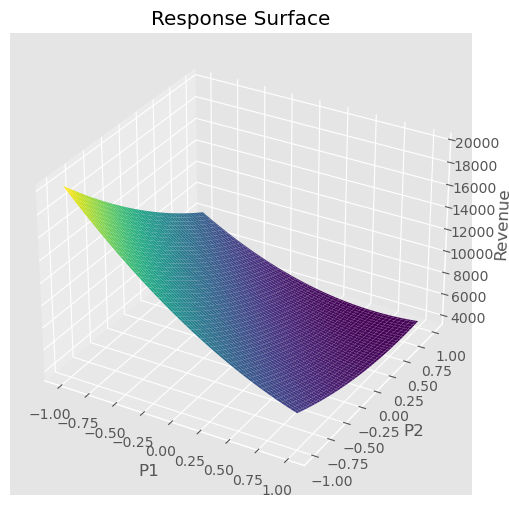

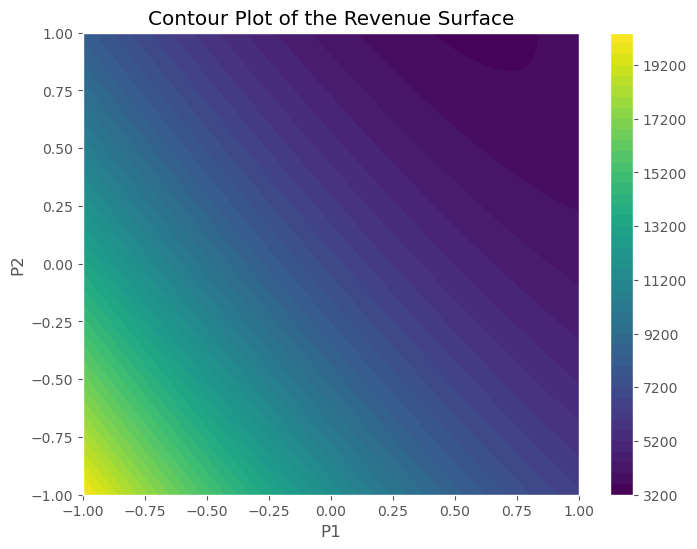

Optimal P1: 88.49393673145747
Optimal P2: 131.9423723512711
Maximum Predicted Revenue: 20206.111559680052
Closest match in the dataset:
P1            89.780172
P2           136.215277
Revenue    10719.409223
P1^2        8060.479304
P2^2       18554.601787
P1_P2      12229.431046
Name: 382, dtype: float64


In [157]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Assuming revenue_df is a DataFrame with columns ['P1', 'P2', 'Revenue']
# Generate dataset for metamodel
revenue_df['P1^2'] = revenue_df['P1'] ** 2
revenue_df['P2^2'] = revenue_df['P2'] ** 2
revenue_df['P1_P2'] = revenue_df['P1'] * revenue_df['P2']

X = revenue_df[['P1', 'P2', 'P1^2', 'P2^2', 'P1_P2']].values
y = revenue_df['Revenue'].values

# Normalize the data using MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))
X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Fit the Ridge Regression model (to handle potential multicollinearity)
model = Ridge(alpha=1e-3)  # Small regularization term
model.fit(X_normalized, y_normalized)

# Extract model parameters
slope = model.coef_
intercept = model.intercept_

# Define the response function based on the metamodel
response_function = lambda s, d: intercept + slope[0]*s + slope[1]*d + slope[2]*s*d + slope[3]*s**2 + slope[4]*d**2

# Validate model predictions on actual data
predicted_revenue_normalized = model.predict(X_normalized)
predicted_revenue = scaler_y.inverse_transform(predicted_revenue_normalized.reshape(-1, 1)).flatten()

# Add a comparison of predicted vs actual revenue
comparison_df = pd.DataFrame({
    "Actual Revenue": y,
    "Predicted Revenue": predicted_revenue
})
print("Comparison of Actual vs Predicted Revenue:")
print(comparison_df.head())

# Visualization of the response surface
x1_vals = np.linspace(-1, 1, 100)
x2_vals = np.linspace(-1, 1, 100)
x1_grid, x2_grid = np.meshgrid(x1_vals, x2_vals)
z_vals = response_function(x1_grid, x2_grid)

# Map back the scaled response to the original scale
z_vals_original = scaler_y.inverse_transform(z_vals.reshape(-1, 1)).reshape(z_vals.shape)

# 3D Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid, z_vals_original, cmap='viridis', edgecolor='none')
ax.set_title("Response Surface")
ax.set_xlabel("P1")
ax.set_ylabel("P2")
ax.set_zlabel("Revenue")
plt.show()

# Contour Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(x1_grid, x2_grid, z_vals_original, cmap='viridis', levels=50)
plt.colorbar(contour)
plt.title("Contour Plot of the Revenue Surface")
plt.xlabel("P1")
plt.ylabel("P2")
plt.show()

# Optimization to find optimal prices
objective_function = lambda x: -response_function(x[0], x[1])  # Negative for maximization
initial_guess = [0, 0]
bounds = [(-1, 1), (-1, 1)]
result = minimize(objective_function, initial_guess, bounds=bounds)

optimal_x1, optimal_x2 = result.x
optimal_response = -objective_function([optimal_x1, optimal_x2])

# Map results back to original scale
optimal_x1_original = scaler_X.inverse_transform([[optimal_x1, optimal_x2, optimal_x1**2, optimal_x2**2, optimal_x1*optimal_x2]])[0][0]
optimal_x2_original = scaler_X.inverse_transform([[optimal_x1, optimal_x2, optimal_x1**2, optimal_x2**2, optimal_x1*optimal_x2]])[0][1]
optimal_response_original = scaler_y.inverse_transform([[optimal_response]])[0][0]

print(f"Optimal P1: {optimal_x1_original}")
print(f"Optimal P2: {optimal_x2_original}")
print(f"Maximum Predicted Revenue: {optimal_response_original}")

# Validate if optimal results exist in the dataset
closest_match = revenue_df.loc[((revenue_df['P1'] - optimal_x1_original).abs() + (revenue_df['P2'] - optimal_x2_original).abs()).idxmin()]
print("Closest match in the dataset:")
print(closest_match)
